In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [180]:
from sklearn.datasets import make_blobs

In [181]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [182]:
X

array([[-9.37695262, -9.63587988],
       [ 5.3078155 , -1.93043962],
       [ 6.49329306,  0.63604841],
       ...,
       [-8.50440209, -9.12933756],
       [ 5.432497  , -0.51446688],
       [-5.12766444,  9.76162743]])

In [183]:
y

array([2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2,
       0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0,
       1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2,
       1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2,

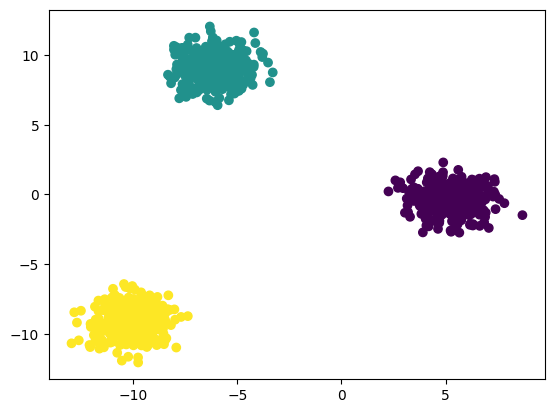

In [184]:
plt.scatter(X[:,0],X[:,1],c=y)

In [185]:
## Standardization -- Feature Scaling Technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [187]:
X_train_scaled = scaler.fit_transform(X_train)

In [188]:
X_test_scaled = scaler.transform(X_test)

In [189]:
from sklearn.cluster import KMeans

In [190]:
## Elbow method: To select the K Values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [191]:
wcss

[1340.0000000000007,
 539.9699683449218,
 26.948980207716865,
 23.392756211939414,
 19.974850983371503,
 16.715514721445842,
 14.937698749953643,
 13.167167818266062,
 11.85755288168413,
 10.998784284125556]

Text(0, 0.5, 'WCSS')

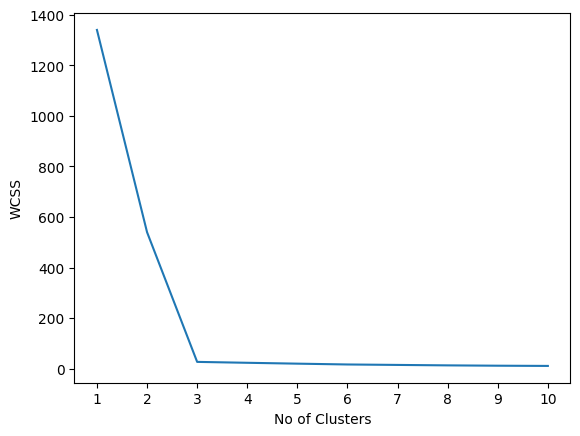

In [192]:
# Plot the elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")

In [193]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [194]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2,

In [195]:
y_pred = kmeans.predict(X_test_scaled)

In [196]:
y_pred

array([2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0,
       0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1,
       2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2,

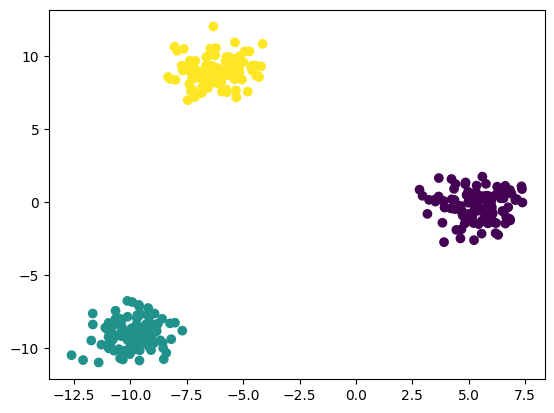

In [197]:
_=plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [198]:
## Validating the K value we use 2 Techniques
## Knee locator
## Silhoutee scoring

In [199]:
## Knee Locator
from kneed import KneeLocator

In [200]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [201]:
kl.elbow

3

In [202]:
## Silhoutte Scoring
from sklearn.metrics import silhouette_score

In [207]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [215]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    print(f"k={k}, Silhouette Score: {score:.4f}")

k=2, Silhouette Score: 0.6531
k=3, Silhouette Score: 0.8876
k=4, Silhouette Score: 0.7128
k=5, Silhouette Score: 0.5369
k=6, Silhouette Score: 0.3481
k=7, Silhouette Score: 0.3523
k=8, Silhouette Score: 0.3514
k=9, Silhouette Score: 0.3447
k=10, Silhouette Score: 0.3303


Text(0, 0.5, 'Silhouette Score')

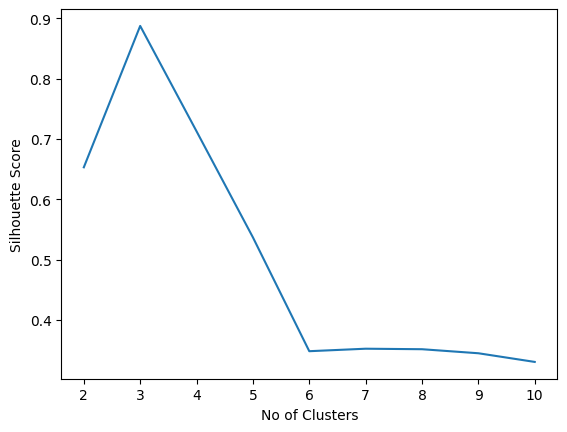

In [216]:
# Plot the elbow curve
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette Score")

- Generally where is the value is high we'll use that